<a href="https://colab.research.google.com/github/Ritanjit/Objection-Detection-using-Yolov8/blob/main/Yolov8_COCO_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection Using YOLOv8

>  Objective: To develop a Python-based program that takes input as image  and detects common objects within the scene. The program should output the same images with bounding boxes drawn around the detected objects, along with their class names and confidence scores displayed on the image. Datasets: COCO

Note: This project implements a visual comparison framework for object detection using three YOLOv8 models (Nano, Medium, Extra-large).





## 1. Environment Setup and Dependencies

In [1]:
# This command installs the 'ultralytics' library, which is required to use YOLOv8.
# The '-q' flag ensures a quiet installation with minimal output.

%pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.9 MB/s eta 0:00:00


In [2]:
# We import all the necessary modules for our object detection task.
# 1. YOLO: The core class from the ultralytics library for running the model.
# 2. cv2: The OpenCV library, used for reading, drawing on, and handling images.
# 3. google.colab.patches.cv2_imshow: A special function to display OpenCV images within a Google Colab notebook.
# 4. files: A module from google.colab to handle file uploads.
# 5. os: The operating system module, used here to check if the file exists.

from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## 2. Upload Test Images

Please upload the image(s) you want to analyze.


Saving 1.jpg to 1.jpg
Saving 3.jpg to 3.jpg
Saving 8.jpg to 8.jpg

Image(s) uploaded successfully.
 - '1.jpg'
 - '3.jpg'
 - '8.jpg'

Displaying uploaded images in grid format:


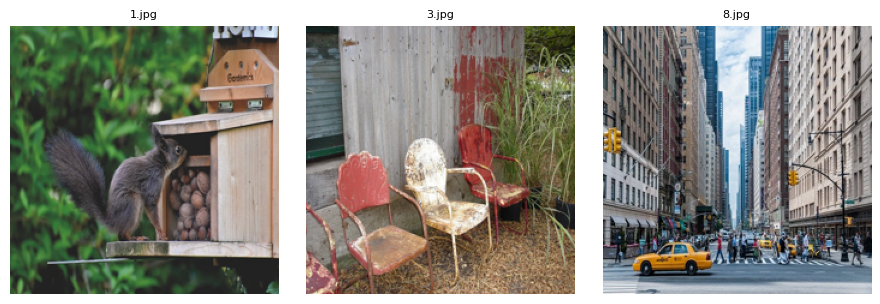

In [3]:
# To upload and Display Images in a Grid (Max 4 per row)

# Upload images
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

print("Please upload the image(s) you want to analyze.")
uploaded = files.upload()

input_image_paths = []
if uploaded:
    print("\nImage(s) uploaded successfully.")
    for filename in uploaded.keys():
        input_image_paths.append(filename)
        print(f" - '{filename}'")
else:
    print("\nUpload cancelled or failed.")

# Display images
max_cols = 4
img_size = (224, 224)  # Fixed display size per image

if input_image_paths:
    print("\nDisplaying uploaded images in grid format:")
    n_images = len(input_image_paths)
    n_rows = (n_images + max_cols - 1) // max_cols

    plt.figure(figsize=(max_cols * 3, n_rows * 3))

    for idx, image_path in enumerate(input_image_paths):
        try:
            img = Image.open(image_path).convert("RGB")
            img = img.resize(img_size)

            plt.subplot(n_rows, max_cols, idx + 1)
            plt.imshow(img)
            plt.title(os.path.basename(image_path), fontsize=8)
            plt.axis("off")
        except Exception as e:
            print(f"Error loading {image_path}: {e}")

    plt.tight_layout()
    plt.show()

## 3. Object Detection using YOLO

In [4]:
# Object Detection Function - This function takes an image path and confidence threshold, performs detection and displays the annotated image.

def detect_with_model(image_path, model_name, confidence_threshold=0.5):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image: {image_path}")

    model = YOLO(model_name)
    results = model(image, conf=confidence_threshold)
    class_names = model.names
    annotated_image = image.copy()

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = float(box.conf[0])
            class_id = int(box.cls[0])
            label = f"{class_names[class_id]}: {confidence:.2f}"
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    return annotated_image

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.5MB/s]



0: 448x640 1 cat, 369.2ms
Speed: 7.3ms preprocess, 369.2ms inference, 31.0ms postprocess per image at shape (1, 3, 448, 640)


100%|██████████| 49.7M/49.7M [00:00<00:00, 227MB/s]



0: 448x640 1 bear, 1518.4ms
Speed: 2.7ms preprocess, 1518.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


100%|██████████| 131M/131M [00:00<00:00, 196MB/s]



0: 448x640 1 bird, 4461.2ms
Speed: 2.8ms preprocess, 4461.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


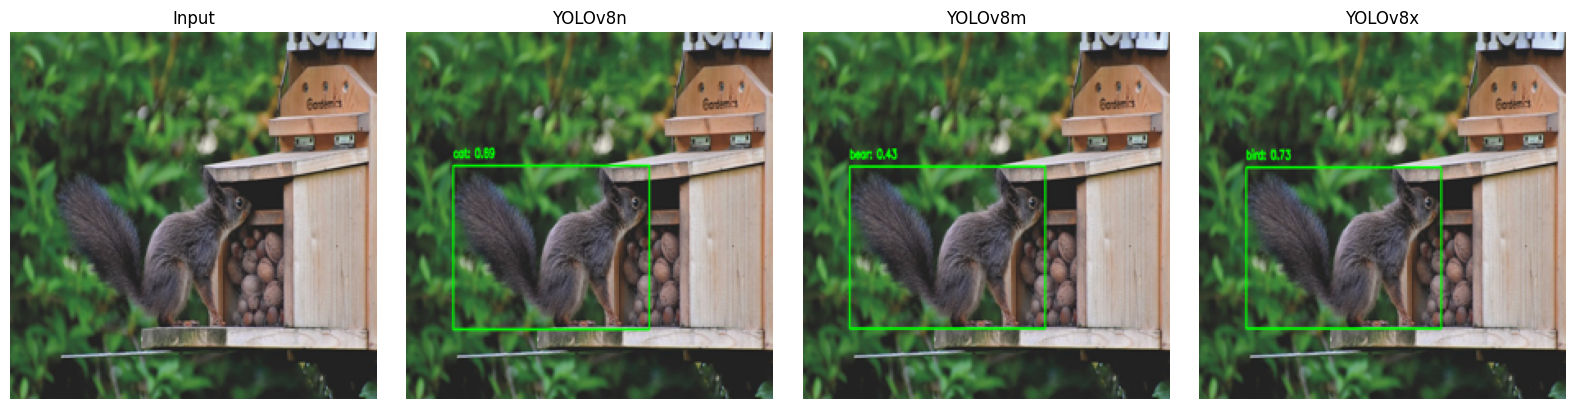


0: 480x640 3 chairs, 199.6ms
Speed: 3.5ms preprocess, 199.6ms inference, 5.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 1248.1ms
Speed: 4.9ms preprocess, 1248.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 chairs, 1 potted plant, 4294.4ms
Speed: 3.2ms preprocess, 4294.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


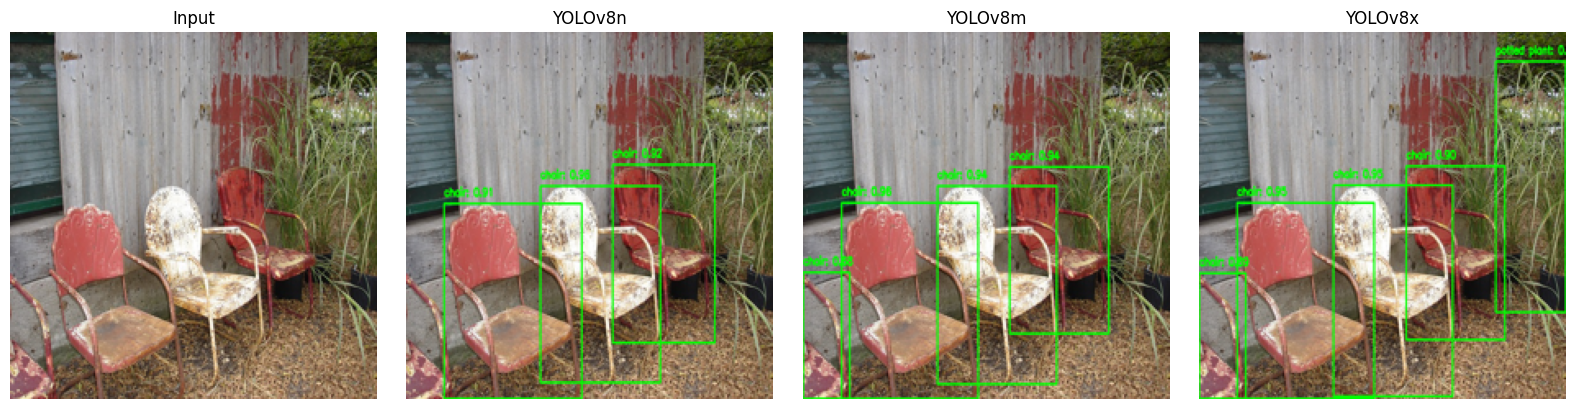


0: 448x640 8 persons, 2 cars, 2 traffic lights, 197.4ms
Speed: 2.9ms preprocess, 197.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 13 persons, 1 bicycle, 5 cars, 4 traffic lights, 1151.5ms
Speed: 4.9ms preprocess, 1151.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 13 persons, 1 bicycle, 5 cars, 3 traffic lights, 4015.1ms
Speed: 3.3ms preprocess, 4015.1ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


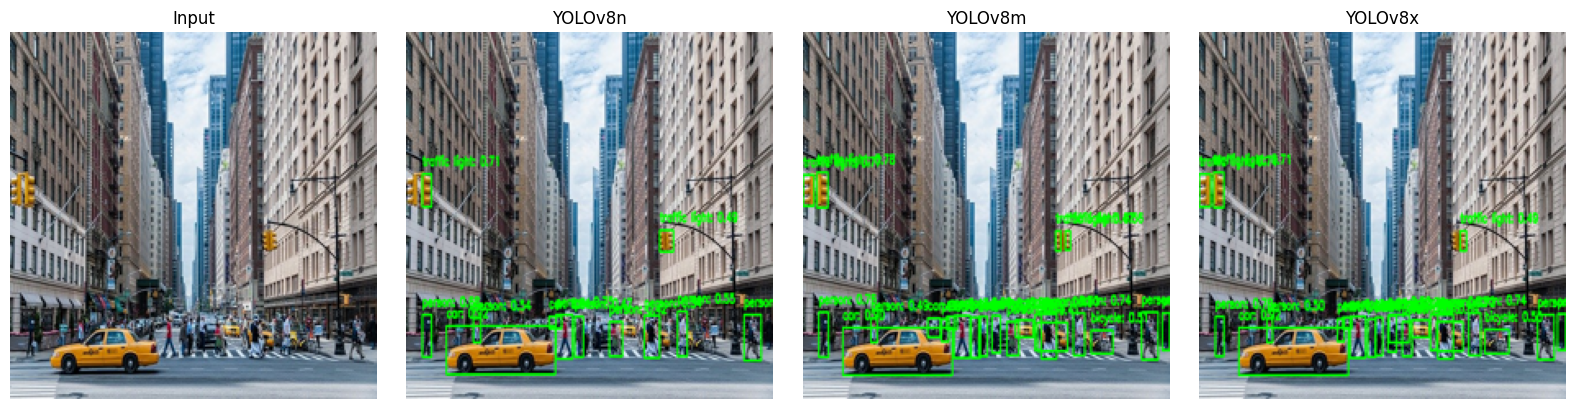

In [5]:
# To run all three YOLO models on each uploaded image and display results in grid

model_variants = {
    "YOLOv8n": "yolov8n.pt",
    "YOLOv8m": "yolov8m.pt",
    "YOLOv8x": "yolov8x.pt",
}

img_size = (224, 224)

for image_path in input_image_paths:
    try:
        original = Image.open(image_path).convert("RGB").resize(img_size)
        outputs = [original]

        for model_name in model_variants.values():
            annotated = detect_with_model(image_path, model_name, confidence_threshold=0.4)
            outputs.append(Image.fromarray(annotated).resize(img_size))

        # To display in one row: [input, yolov8n, yolov8m, yolov8x]
        plt.figure(figsize=(16, 4))
        titles = ["Input"] + list(model_variants.keys())

        for idx, img in enumerate(outputs):
            plt.subplot(1, 4, idx + 1)
            plt.imshow(img)
            plt.title(titles[idx])
            plt.axis("off")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

## 4. Gradio Interface


In [6]:
# To install the Gradio library for creating a web-based UI.

%pip install -q gradio

In [7]:
# YOLO models Function - to run object detection for input image and all 3 YOLO model outputs instead of displaying it directly.

def detect_with_all_models(image_path, confidence_threshold=0.4):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read image: {image_path}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    models = {
        "YOLOv8n": YOLO("yolov8n.pt"),
        "YOLOv8m": YOLO("yolov8m.pt"),
        "YOLOv8x": YOLO("yolov8x.pt"),
    }

    def annotate(model):
        results = model(image, conf=confidence_threshold)
        annotated = image.copy()
        class_names = model.names
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                confidence = float(box.conf[0])
                class_id = int(box.cls[0])
                label = f"{class_names[class_id]}: {confidence:.2f}"
                cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(annotated, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        return cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    original = image_rgb
    yolov8n = annotate(models["YOLOv8n"])
    yolov8m = annotate(models["YOLOv8m"])
    yolov8x = annotate(models["YOLOv8x"])

    return [original, yolov8n, yolov8m, yolov8x]

In [8]:
# batch processing function for Gradio

def process_images_multi_model(image_paths):
    output_grid = []
    for image_path in image_paths:
        try:
            row = detect_with_all_models(image_path)
            output_grid.extend(row)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    return output_grid

In [9]:
# To create the Gradio Interface
import gradio as gr

iface = gr.Interface(
    fn=process_images_multi_model,
    inputs=gr.File(
        file_count="multiple",
        type="filepath",
        label="Upload Images for Detection"
    ),
    outputs=gr.Gallery(
        label="YOLOv8 Detection Results (Input | YOLOv8n | YOLOv8m | YOLOv8x)",
        columns=4,  # ✅ Use 'columns' instead of .style(grid=[4])
        height="auto"  # ✅ Valid property for dynamic gallery height
    ),
    title="Multi-Model Object Detection with YOLOv8",
    description=(
        "Upload one or more images to compare detection results from YOLOv8n, YOLOv8m, and YOLOv8x models. "
        "Each row represents one input image with its detection outputs."
    )
)

In [10]:
# To launch the Gradio interface -this starts a local web server and provide a URL to access the UI. In Google Colab, it also provides a public URL.

iface.launch(debug=True) # debug=True is for more detailed output during development

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://042715bbc583bceac8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 544x640 2 persons, 2 sports balls, 230.1ms
Speed: 2.6ms preprocess, 230.1ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 persons, 2 sports balls, 1404.3ms
Speed: 3.8ms preprocess, 1404.3ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 persons, 2 sports balls, 5503.1ms
Speed: 3.3ms preprocess, 5503.1ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 416x640 1 dog, 178.9ms
Speed: 3.0ms preprocess, 178.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 person, 1 dog, 1 bowl, 1105.2ms
Speed: 2.7ms preprocess, 1105.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 person, 1 dog, 1 backpack, 4402.4ms
Speed: 3.1ms preprocess, 4402.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)

0: 448x640 1 cup, 1 laptop, 310.1ms
Speed: 3.0ms preprocess, 310.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

0: 448